In [9]:
import numpy as np  #does mathematical operation
import matplotlib.pyplot as plt #For plotting the graphs
import pandas as pd #making the data frames and import the csv files

In [10]:
dataset = pd.read_csv('heart.csv')      #To read the CSV File       

In [11]:
dataset.head()     #to Print the first 5 Values of the Dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
dataset.describe()      #Would result into the Statistical Analysis of all the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
dataset.shape   #Our dataset has 303 datapoints for 13 input feature and 1 output/target variable.

(303, 14)

In [14]:
X_input_features = dataset.iloc[:,:12]      #Seperating the independent input features from the dataset

In [15]:
X_input_features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1


In [17]:
X_input_features        #printing the result

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1


In [19]:
Y_target_variable = dataset.iloc[:,-1]         #seperating the target or dependent variable Y from the Dataset      

In [20]:
Y_target_variable        #printing the result

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:
isHeart_risk = dataset.loc[Y_target_variable==1]        #Seperatign the patient who has heart risk

In [22]:
notHeart_risk = dataset.loc[Y_target_variable==0]       #Seperatign the patient who not have heart risk

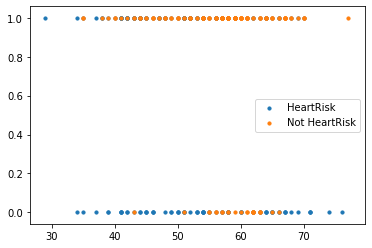

Text(0.5, 1.0, 'Graph for the people who have heart risk or not based on age and sex')

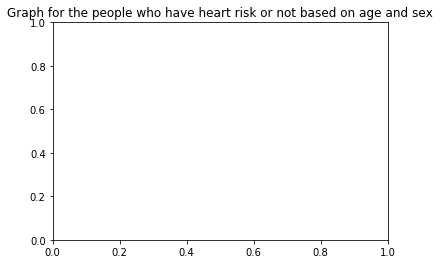

In [23]:
#Plot to show the difference in the classes given in the dataset.
plt.scatter(isHeart_risk.iloc[:, 0], isHeart_risk.iloc[:, 1], s=10, label='HeartRisk')
plt.scatter(notHeart_risk.iloc[:, 0], notHeart_risk.iloc[:, 1], s=10, label='Not HeartRisk')
plt.legend()
plt.show()
plt.title('Graph for the people who have heart risk or not based on age and sex')

In [24]:
#import the library for the testing and the training split.
from sklearn.model_selection import train_test_split

In [25]:
#convert to the array
X_input_features = np.array(X_input_features)
Y_target_variable = np.array(Y_target_variable)

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X_input_features,Y_target_variable,test_size=0.25,random_state=42)      #First train and test data for featureand then for labels

In [28]:
#Seeing all 4 seperated values.

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(227, 12)
(76, 12)
(227,)
(76,)


In [48]:
X_train

array([[250, 4.0760000000000005, 0.0, ..., 0.0, 180.0, 'no'],
       [341, 4.1530000000000005, 0.0, ..., 0.0, 135.0, 'no'],
       [437, 1.244, 0.0, ..., 0.0, 317.0, 'no'],
       ...,
       [270, 1.25, 0.0, ..., 0.0, 760.0, 'yes'],
       [435, 4.855, 0.0, ..., 0.0, 241.0, 'no'],
       [102, 0.715, 0.0, ..., 0.0, 747.0, 'yes']], dtype=object)

In [29]:
#Import the KNN classifire libraray for model evaluation
from sklearn.neighbors import KNeighborsClassifier

In [30]:
#Model Evaluation for the neighours = 3
knn_model_evaluation_K_3 = KNeighborsClassifier(n_neighbors=3)

In [31]:
knn_model_evaluation_K_3.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [32]:
Y_pred_model_k_3 = knn_model_evaluation_K_3.predict(X_test)

In [33]:
#priting the confusion matrix based on the prediction
#import the confusion matrix library
from sklearn import metrics

In [34]:
#making the confusion matrix
confusion_matrixx = metrics.confusion_matrix(Y_test,Y_pred_model_k_3)

In [35]:
confusion_matrixx       #print the confusion matrix

array([[24, 11],
       [14, 27]], dtype=int64)

In [36]:
#printing the Parameter for the model learining like accuracy , precision and recall
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_model_k_3))
print("Precision:",metrics.precision_score(Y_test, Y_pred_model_k_3))
print("Recall:",metrics.recall_score(Y_test, Y_pred_model_k_3))

Accuracy: 0.6710526315789473
Precision: 0.7105263157894737
Recall: 0.6585365853658537


In [37]:
#For the K value of = 5
knn_model_evaluation_K_5 = KNeighborsClassifier(n_neighbors=5)
knn_model_evaluation_K_5.fit(X_train,Y_train)
Y_pred_model_k_5 = knn_model_evaluation_K_5.predict(X_test)
confusion_matrixx = metrics.confusion_matrix(Y_test,Y_pred_model_k_5)
print(confusion_matrixx)       #print the confusion matrix
#printing the Parameter for the model learining like accuracy , precision and recall
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_model_k_5))
print("Precision:",metrics.precision_score(Y_test, Y_pred_model_k_5))
print("Recall:",metrics.recall_score(Y_test, Y_pred_model_k_5))

[[22 13]
 [10 31]]
Accuracy: 0.6973684210526315
Precision: 0.7045454545454546
Recall: 0.7560975609756098


In [38]:
#For the K value of = 7
knn_model_evaluation_K_7= KNeighborsClassifier(n_neighbors=7)
knn_model_evaluation_K_7.fit(X_train,Y_train)
Y_pred_model_k_7= knn_model_evaluation_K_7.predict(X_test)
confusion_matrixx = metrics.confusion_matrix(Y_test,Y_pred_model_k_7)
print(confusion_matrixx)       #print the confusion matrix
#printing the Parameter for the model learining like accuracy , precision and recall
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_model_k_7))
print("Precision:",metrics.precision_score(Y_test, Y_pred_model_k_7))
print("Recall:",metrics.recall_score(Y_test, Y_pred_model_k_7))

[[22 13]
 [ 8 33]]
Accuracy: 0.7236842105263158
Precision: 0.717391304347826
Recall: 0.8048780487804879


In [33]:
#For the K value of = 9
knn_model_evaluation_K_9= KNeighborsClassifier(n_neighbors=9)
knn_model_evaluation_K_9.fit(X_train,Y_train)
Y_pred_model_k_9= knn_model_evaluation_K_9.predict(X_test)
confusion_matrixx = metrics.confusion_matrix(Y_test,Y_pred_model_k_9)
print(confusion_matrixx)       #print the confusion matrix
#printing the Parameter for the model learining like accuracy , precision and recall
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_model_k_9))
print("Precision:",metrics.precision_score(Y_test, Y_pred_model_k_9))
print("Recall:",metrics.recall_score(Y_test, Y_pred_model_k_9))

[[20 15]
 [ 7 34]]
Accuracy: 0.7105263157894737
Precision: 0.6938775510204082
Recall: 0.8292682926829268


In [40]:
#For the K value of = 11
knn_model_evaluation_K_11= KNeighborsClassifier(n_neighbors=11)
knn_model_evaluation_K_11.fit(X_train,Y_train)
Y_pred_model_k_11= knn_model_evaluation_K_11.predict(X_test)
confusion_matrixx = metrics.confusion_matrix(Y_test,Y_pred_model_k_11)
print(confusion_matrixx)       #print the confusion matrix
#printing the Parameter for the model learining like accuracy , precision and recall
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_model_k_11))
print("Precision:",metrics.precision_score(Y_test, Y_pred_model_k_11))
print("Recall:",metrics.recall_score(Y_test, Y_pred_model_k_11))

[[23 12]
 [ 7 34]]
Accuracy: 0.75
Precision: 0.7391304347826086
Recall: 0.8292682926829268


In [39]:
#For the K value of = 13
knn_model_evaluation_K_13= KNeighborsClassifier(n_neighbors=13)
knn_model_evaluation_K_13.fit(X_train,Y_train)
Y_pred_model_k_13= knn_model_evaluation_K_13.predict(X_test)
confusion_matrixx = metrics.confusion_matrix(Y_test,Y_pred_model_k_13)
print(confusion_matrixx)       #print the confusion matrix
#printing the Parameter for the model learining like accuracy , precision and recall
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_model_k_13))
print("Precision:",metrics.precision_score(Y_test, Y_pred_model_k_13))
print("Recall:",metrics.recall_score(Y_test, Y_pred_model_k_13))

[[22 13]
 [ 9 32]]
Accuracy: 0.7105263157894737
Precision: 0.7111111111111111
Recall: 0.7804878048780488
